# Decision Trees: Scikit-Learn
M2U5 - Exercise 1

## What are we going to do?
- We will train a linear regression model using decision trees
- We will check to see if there is any deviation or overfitting in the model
- We will optimise the hyperparameters with validation
- We will evaluate the model on the test subset

Remember to follow the instructions for the submission of assignments indicated in [Submission Instructions](https://github.com/Tokio-School/Machine-Learning-EN/blob/main/Submission_instructions.md).

## Instructions
We are going to solve a multivariate linear regression problem similar to the previous exercises, but this time using a decision tree for linear regression.

An example that you can use as a reference for this exercise: [Decision Tree Regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

In [1]:
# TODO: Import all the necessary modules into this cell
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Generate a synthetic dataset

Generate a synthetic dataset with a fairly large error term and few features, manually or with Scikit-learn:

In [2]:
# TODO: Generate a synthetic dataset, with few features and a significant error term
# Do not add a bias term to X

m = 1000
n = 2


X, y, theta_true = make_regression(n_samples=m, n_features=n, noise= 50, coef=True, random_state=42)

# Check the values and dimensions of the vectors
print("Theta (true coefficients) and its dimensions to be estimated:")
print(theta_true)
print("Theta shape:", theta_true.shape)
print()

print("First 10 rows of X and first 10 values of y:")
print("X (first 10 rows):")
print(X[:10])
print()
print("y (first 10 values):")
print(y[:10])
print()

print("Dimensions of X and y:")
print("X shape:", X.shape)
print("y shape:", y.shape)

Theta (true coefficients) and its dimensions to be estimated:
[40.71064891  6.60098441]
Theta shape: (2,)

First 10 rows of X and first 10 values of y:
X (first 10 rows):
[[-0.16711808  0.14671369]
 [-0.02090159  0.11732738]
 [ 0.15041891  0.364961  ]
 [ 0.55560447  0.08958068]
 [ 0.05820872 -1.1429703 ]
 [-0.96697614 -0.04771136]
 [-1.00162001 -0.28110029]
 [-1.66940528  0.54336019]
 [ 0.11958037 -0.97306894]
 [-1.40631746 -0.08310557]]

y (first 10 values):
[-51.64462651 -63.08467948  54.7462601  -59.53403278 -50.27759214
  32.50043199 -25.62957449  -2.58675054  35.0385167  -19.39031428]

Dimensions of X and y:
X shape: (1000, 2)
y shape: (1000,)


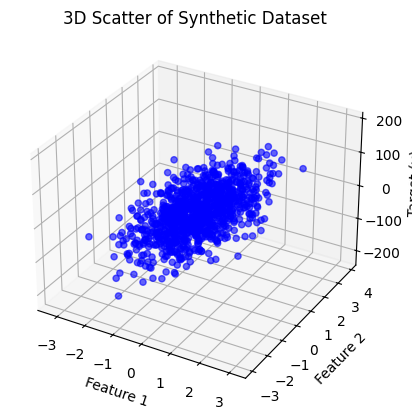

In [3]:
# TODO: Graphically represent the dataset in 3D to ensure that the error term is sufficiently high

ax = plt.axes(projection="3d")
ax.scatter(X[:, 0], X[:, 1], y, c="blue", alpha=0.6)

ax.set_title("3D Scatter of Synthetic Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Target (y)")

plt.show()

## Preprocess the data
- Randomly reorder the data.
- Divide the dataset into training and test subsets.

*Note*: We will use K-fold again for the cross-validation.

In [4]:
# TODO: Randomly reorder the data, and divide them into training and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Train an initial model

We will begin exploring decision tree models for regression with an initial model.

To do this, train a [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) model on the training subset:

In [5]:
# TODO: Train a regression tree on the training subset with a max. depth of 2

model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=42)

Now check the suitability of the model by evaluating it on the test subset:

In [6]:
# TODO: Evaluate the model with MSE, RMSE and R^2 on the test subset

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error: 2731.6817211136663
Root Mean Squared Error: 52.265492642025926
Coefficient of Determination (R²): 0.2836253238580747


*QUESTION:*
*Do you think there is deviation or overfitting in this model?*

To find out, compare its accuracy with that calculated on the training subset and answer in this cell:

In [7]:
# TODO: Now evaluate the model with MSE, RMSE and R^2 on the training subset

y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error: 2521.984949100455
Root Mean Squared Error: 50.219368266640465
Coefficient of Determination (R²): 0.40455026181363185


There is not overfitting or deviation in this model, but it doesn"t explain a lot of the variability.  


As mentioned above, decision trees tend to overfit, to over-adjust to the data used to train them, and sometimes fail to predict well on new examples.

We are going to check this graphically by training another model with a much larger maximum depth of 6:

In [8]:
# TODO: Train another regression tree on the training subset with max. depth of 6
model_6 = DecisionTreeRegressor(max_depth=6, random_state=42)
model_6.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [9]:
# TODO: Now evaluate the model with MSE, RMSE, and R^2 on the training subset

y_train_pred = model_6.predict(X_train)

mse_6= mean_squared_error(y_train, y_train_pred)
rmse_6 = np.sqrt(mse_6)
r2_6 = r2_score(y_train, y_train_pred)

print("Mean Squared Error:", mse_6)
print("Root Mean Squared Error:", rmse_6)
print("Coefficient of Determination (R²):", r2_6)

Mean Squared Error: 1802.1420091996506
Root Mean Squared Error: 42.45164318609647
Coefficient of Determination (R²): 0.5745077749431706


Compare the training accuracy of this model with the previous one (on the training subset).

*QUESTION:* Is the accuracy greater or lesser as the maximum depth of the tree increases?

The error is lower, and the model explains more of the variability with the tree that has more branches.

We will now plot both models, to check whether they suffer from deviation or overfitting.

To do so, you can be guided by the preceding example: [Decision Tree Regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

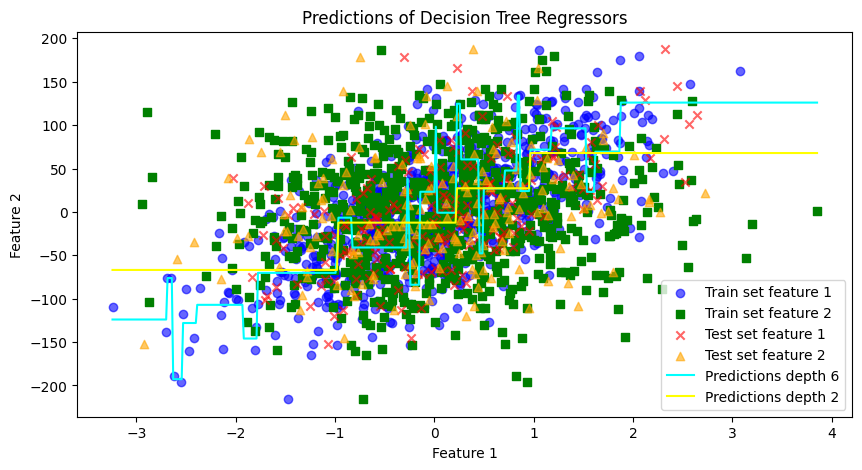

In [10]:
# TODO: Graphically represent the predictions of both models

plt.figure(figsize = (10,5))

plt.title("Predictions of Decision Tree Regressors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the training subset for features 1 and 2 (with different shapes) in a dot plot
plt.scatter(X_train[:, 0], y_train, marker="o", color="blue",alpha=0.6, label="Train set feature 1")
plt.scatter(X_train[:, 1], y_train, marker="s", color="green", label="Train set feature 2")

# Plot the test subset for features 1 and 2 (with different shapes) in a dot plot, with a different colour from the training subset
plt.scatter(X_test[:, 0], y_test, marker="x", color="red", alpha=0.6, label="Test set feature 1")
plt.scatter(X_test[:, 1], y_test, marker="^", color="orange", alpha=0.6, label="Test set feature 2")

# Plot the predictions of the two models on a line graph, with different colours, and a legend to distinguish them
# Use a linear space with a large number of elements between the max. and min. value of both X features as the horizontal axis
x_axis = np.linspace(X.min(), X.max(), 500)
plt.plot(x_axis, model_6.predict(np.c_[x_axis, x_axis]), color="cyan", label="Predictions depth 6")
plt.plot(x_axis, model.predict(np.c_[x_axis, x_axis]), color="yellow", label="Predictions depth 2")

plt.legend()
plt.show()

The deeper decision tree (depth 6) produces a more complex and irregular prediction function, indicating higher variance and potential overfitting. In contrast, the shallow tree (depth 2) generates a smoother prediction, showing higher bias but better generalization

As we have seen, too small a max. depth generally leads to a model with deviation, a model that is not able to fit the curve well enough, while too high a max. depth leads to a model with overfitting, a model that fits the curve very well, but does not have good accuracy on future examples.

Therefore, among all regression tree hyperparameters, we have the maximum depth, which we need to optimise using validation. There are also other hyperparameters, such as the criteria for measuring the quality of a split, the strategy for creating that split, the min. number of examples needed to split a node, etc.

For the sake of simplicity, let"s start by performing a cross-validation just to find the optimal value for the maximum depth:

In [11]:
# TODO: Train a different model for each max_depth value considered on a different fold

from sklearn.model_selection import KFold


# Values of max_depth to be considered in an integer space [1, 8]
max_depths = np.arange(1, 9)


# Create x K-fold splits, one for each value of max_depth to be considered
kf = KFold(n_splits=len(max_depths), shuffle=True, random_state=42)

# Iterate on the splits, train your models and evaluate them on the generated CV subset
linear_models = []
best_model = None
best_score = -np.inf

for (train, cv), max_depth in zip(kf.split(X), max_depths):

    # Train a model on the training subset
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X[train], y[train])

    # Evaluate it on the cv subset
    score = model.score(X[cv], y[cv])

    print("Max. depth used:", max_depth)
    print("R^2 on CV set:", score)

    linear_models.append(model)

    # If the model is better than the best model so far, update the best model found
    if score > best_score:
        best_score = score
        best_model = model

    print(
        "Max. depth and R^2 of the best tree so far:",
        best_model.max_depth,
        best_model.score(X[cv], y[cv]))


Max. depth used: 1
R^2 on CV set: 0.2860804501386174
Max. depth and R^2 of the best tree so far: 1 0.2860804501386174
Max. depth used: 2
R^2 on CV set: 0.22607340588547642
Max. depth and R^2 of the best tree so far: 1 0.1371733385995989
Max. depth used: 3
R^2 on CV set: 0.34713866021846895
Max. depth and R^2 of the best tree so far: 3 0.34713866021846895
Max. depth used: 4
R^2 on CV set: 0.3869253587552802
Max. depth and R^2 of the best tree so far: 4 0.3869253587552802
Max. depth used: 5
R^2 on CV set: 0.3804743297298224
Max. depth and R^2 of the best tree so far: 4 0.5231305202488249
Max. depth used: 6
R^2 on CV set: 0.27237239386248546
Max. depth and R^2 of the best tree so far: 4 0.4160326903521343
Max. depth used: 7
R^2 on CV set: 0.47597976255599606
Max. depth and R^2 of the best tree so far: 7 0.47597976255599606
Max. depth used: 8
R^2 on CV set: -0.201131291845134
Max. depth and R^2 of the best tree so far: 7 0.4036070365552138


The best tree is with 4 branches

## Evaluate the model on the test subset

Finally, we are going to evaluate the model on the test subset.

To do this, calculate its MSE, RMSE, and R^2 metrics

In [12]:
# TODO: Evaluate the model with MSE, RMSE and R^2 on the test subset

y_train_test = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_train_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_train_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of Determination (R²):", r2)


Mean Squared Error: 1751.6582429865616
Root Mean Squared Error: 41.8528164283667
Coefficient of Determination (R²): 0.5406333040808097
